In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [3]:
tidy_data = pd.read_csv('../Documents/tb-tidy.csv')
df = tidy_data
df


,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,7,Beko,33.0,M,3.0
1,10,Beko,50.0,M,2.0
2,11,Tefal,36.0,M,2.5
3,3,Beko,62.0,K,2.5
4,8,Beko,38.0,M,2.0
...,...,...,...,...,...
322,10,Tefal,34.0,M,2.0
323,8,Beko,19.0,M,2.5
324,9,Electrolux,50.0,K,3.0
325,5,Tefal,41.0,M,3.0


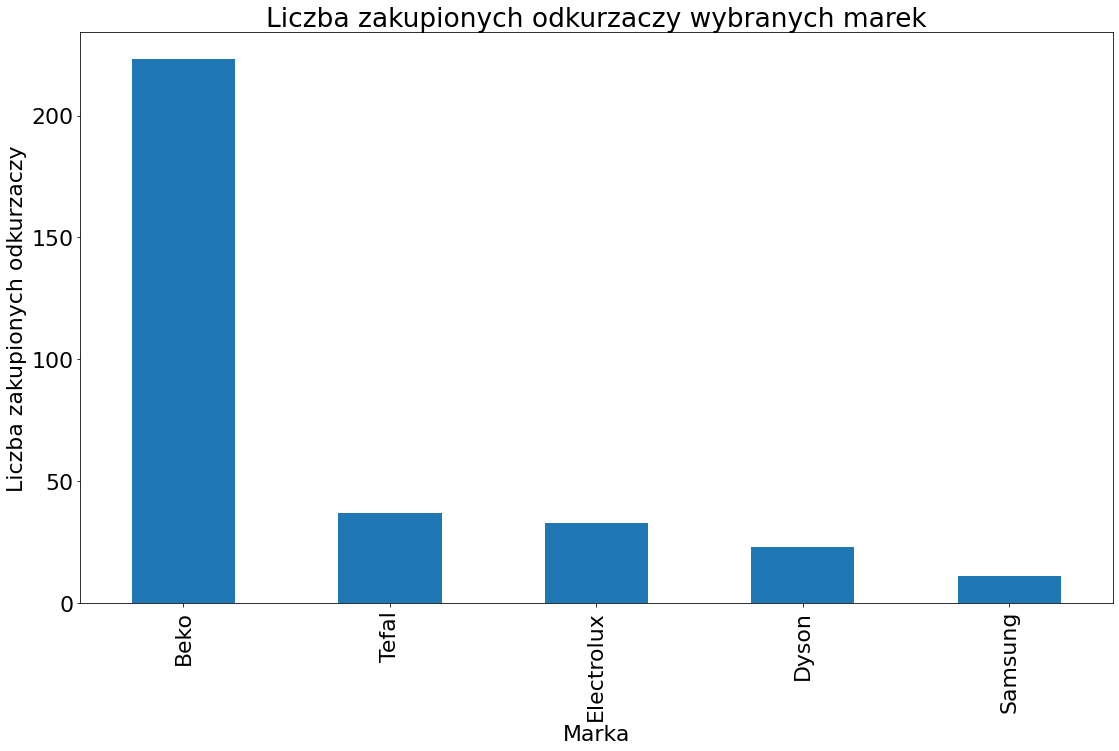

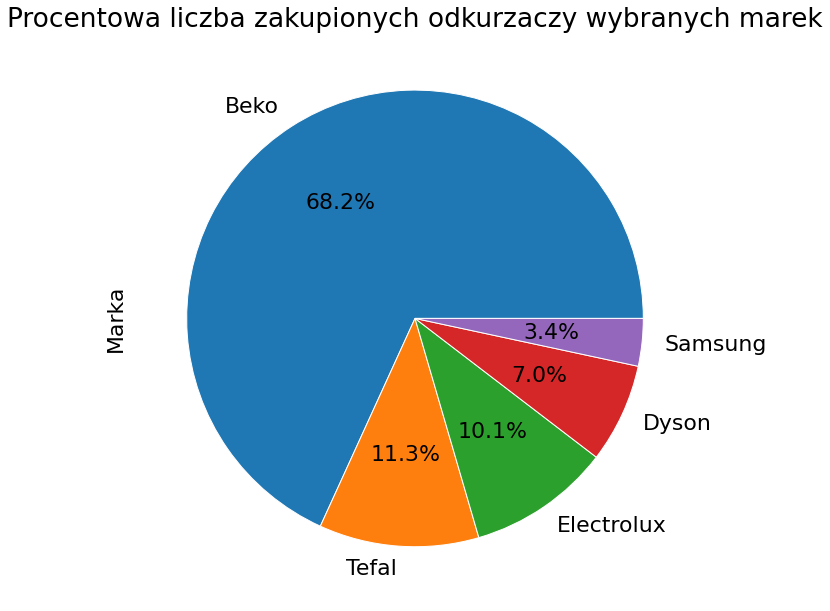

In [4]:
df_marka =df["Marka"].value_counts()
df_marka

plt.rcParams.update({'font.size': 22})
fig1, ax = plt.subplots()
df_marka.plot(kind="bar")
fig1.set_size_inches(18.5, 10.5)
plt.title("Liczba zakupionych odkurzaczy wybranych marek")
plt.ylabel("Liczba zakupionych odkurzaczy")
plt.xlabel("Marka")
plt.savefig(r'../Documents/DataAppendix/Liczba zakupionych odkurzaczy.png')
plt.show()

fig2, ax = plt.subplots()
fig2.set_size_inches(18.5, 10.5)
df_marka.plot.pie(autopct='%1.1f%%', wedgeprops={'edgecolor':'white'}, shadow=False)
plt.title("Procentowa liczba zakupionych odkurzaczy wybranych marek")
plt.savefig(r'../Documents/DataAppendix/Procentowa liczba zakupionych odkurzaczy.png')
plt.show()


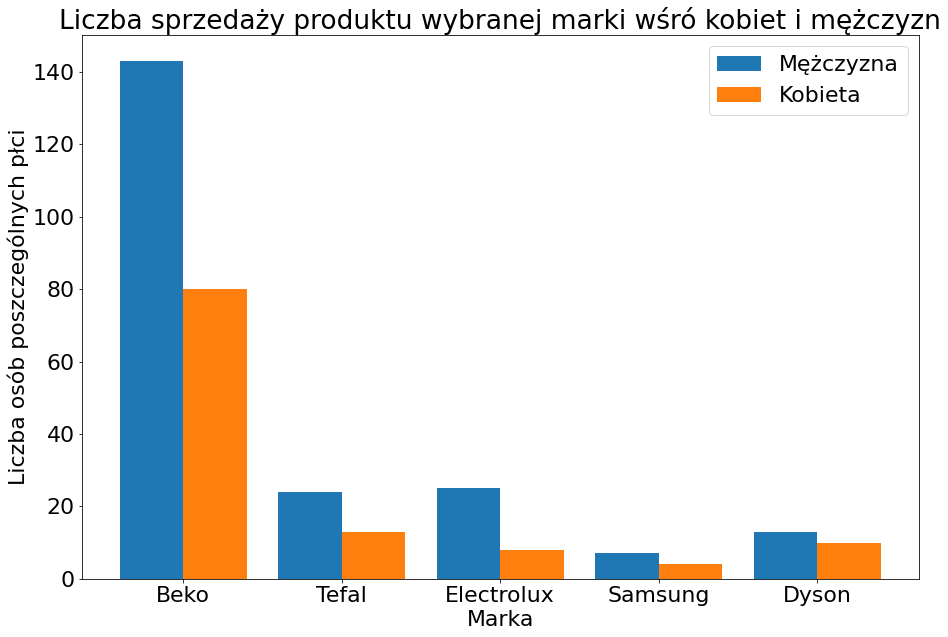

In [5]:
# utworzenie listy marek
list_brands = list(df["Marka"].unique())

#utworzenie pustego słownika gdzie kluczem jest marka a wartością krotka reprezentująca liczbę mężczyzn i kobiet
brands_dic = {
    brand : (0, 0) for brand in list_brands
}

#funkcja zliczająca liczbę mężczyzn i kobiet, którzy zakupili odkurzacz danej marki

def number_of_m_and_w(brand: str)->int:
    filt = df["Marka"] == brand
    number_of_males = df[filt]["Płeć kupującego"].value_counts()['M']
    number_of_females = df[filt]["Płeć kupującego"].value_counts()['K']
    return (number_of_males, number_of_females)

# usupełnienie słownika

list_of_males_and_females = [number_of_m_and_w(brand) for brand in list_brands]
for brand, num_of_males_females in zip(list_brands, list_of_males_and_females):
    brands_dic[brand] = num_of_males_females


names = brands_dic.keys()
valuesM = [val[0] for val in brands_dic.values()]
valuesK= [val[1] for val in brands_dic.values()]

fig3, ax = plt.subplots()
X_axis = np.arange(len(names))
fig3.set_size_inches(15, 10)
plt.bar(X_axis - 0.2, valuesM, 0.4, label = 'Mężczyzna')
plt.bar(X_axis + 0.2, valuesK, 0.4, label = 'Kobieta')
plt.xticks(X_axis, names)
plt.xlabel("Marka")
plt.ylabel("Liczba osób poszczególnych płci")
plt.title("Liczba sprzedaży produktu wybranej marki wśró kobiet i mężczyzn")
plt.savefig(r'../Documents/DataAppendix/Liczba sprzedaży produktu wybranej marki wśró kobiet i mężczyzn.png')
plt.legend()
plt.show()


Średnia wieku osób, które zakupiły rzecz marki Beko:  39
Średnia wieku osób, które zakupiły rzecz marki Tefal:  41
Średnia wieku osób, które zakupiły rzecz marki Electrolux:  42
Średnia wieku osób, które zakupiły rzecz marki Samsung:  39
Średnia wieku osób, które zakupiły rzecz marki Dyson:  41


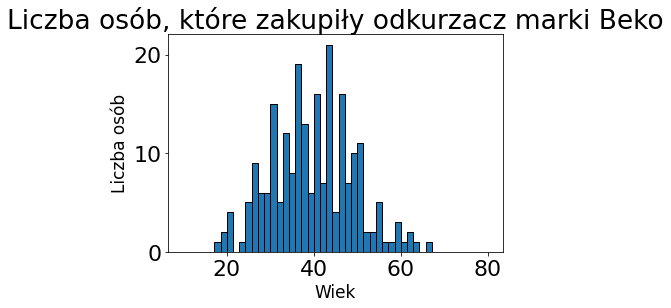

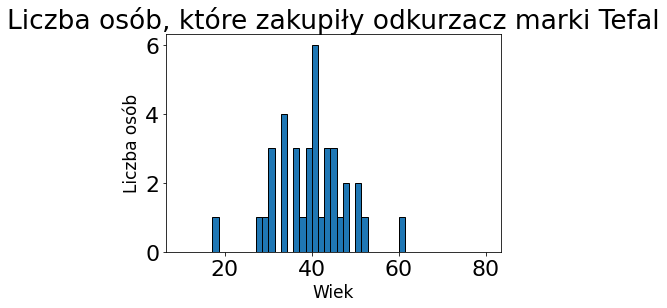

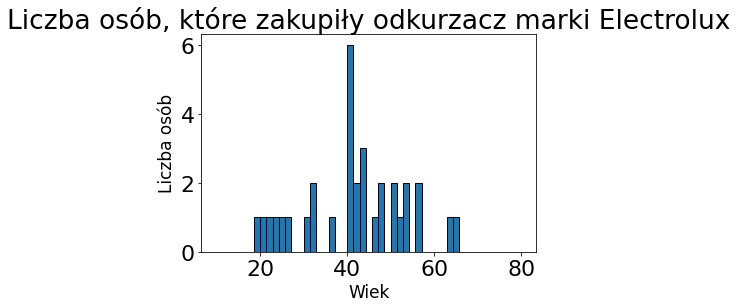

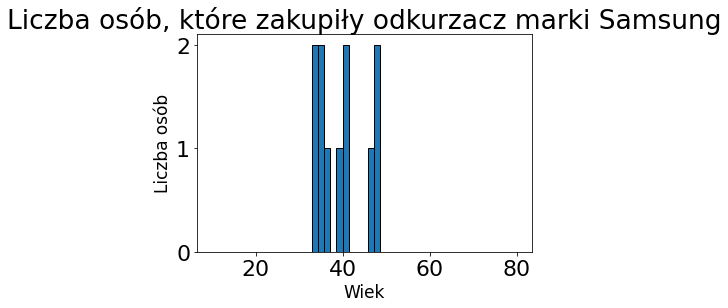

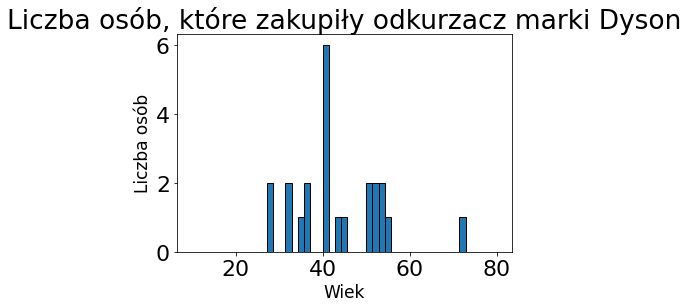

In [8]:
brands = list(df["Marka"].unique())


# funkcja generująca wykres liczby osób w danym wieku dla poszczególnej marki
def groupByAge(brand: str):
    df_new = df[df['Marka'] == brand]
    df_marka_age = df_new['Wiek kupującego']
    x = np.linspace(10,80)
    figure, ax = plt.subplots()
    ax.hist(df_marka_age , bins=x, edgecolor='black')
    ax.set_title(f"Liczba osób, które zakupiły odkurzacz marki {brand}")
    ax.set_ylabel("Liczba osób", fontsize=17)
    plt.savefig(f'../Documents/DataAppendix/Wiek osób, które zakupiły odkurzacz marki{brand}.png', bbox_inches='tight')
    ax.set_xlabel("Wiek", fontsize=17)


for brand in brands:
    groupByAge(brand)

# policzenie mediany wieku dla każdej marki
for brand in brands:
    df_new = df[df['Marka'] == brand]
    df_marka_age = df_new['Wiek kupującego']
    median_age = int(df_marka_age.median())
    print(f"Średnia wieku osób, które zakupiły rzecz marki {brand}: ", median_age)



Średnia ocen osób, które zakupiły rzecz marki Beko:  2
Średnia ocen osób, które zakupiły rzecz marki Tefal:  2
Średnia ocen osób, które zakupiły rzecz marki Electrolux:  2
Średnia ocen osób, które zakupiły rzecz marki Samsung:  3
Średnia ocen osób, które zakupiły rzecz marki Dyson:  2


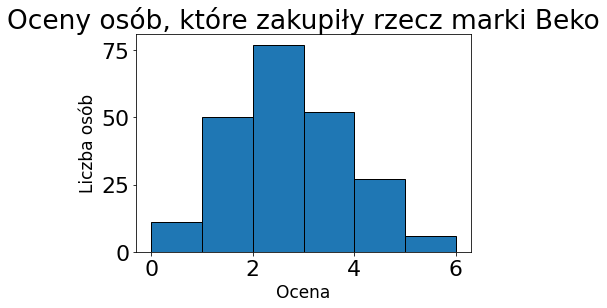

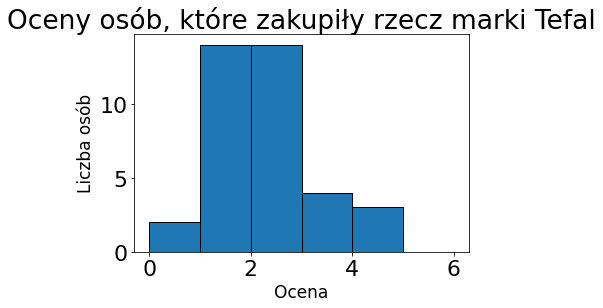

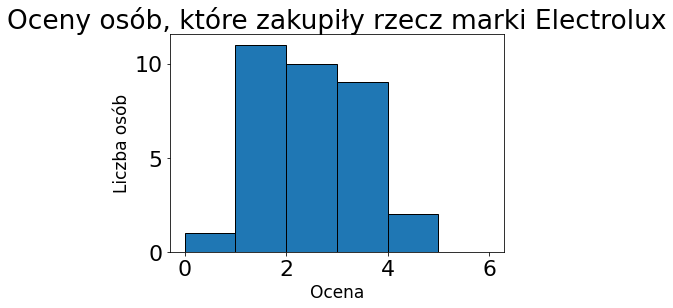

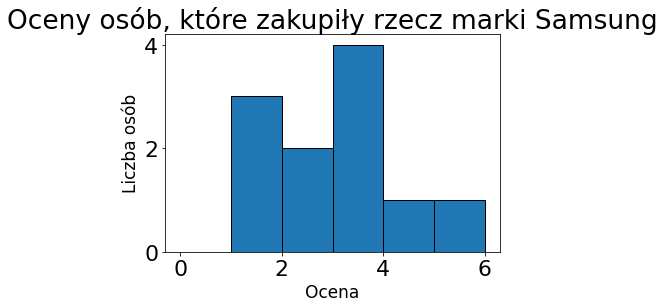

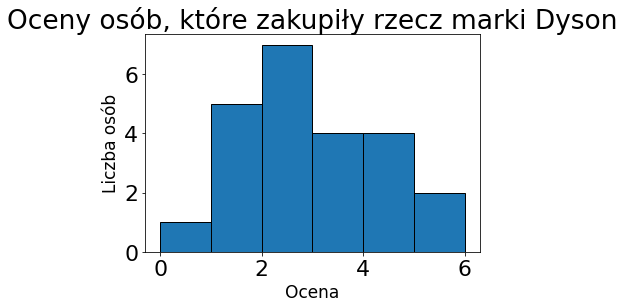

In [9]:
brands = list(df["Marka"].unique())

# funkcja generująca wykres liczby danych ocen  dla poszczególnej marki
def groupByAge(brand: str):
    df_new = df[df['Marka'] == brand]
    df_marka_age = df_new['Ocena']
    x = [0,1,2,3,4,5,6]
    df_marka_age 
    fig, ax = plt.subplots()
    ax.hist(df_marka_age , bins=x,edgecolor='black')
    ax.set_title(f"Oceny osób, które zakupiły rzecz marki {brand}")
    plt.savefig(f'../Documents/DataAppendix/Oceny osób, które zakupiły odkurzacz marki{brand}.png', bbox_inches='tight')
    ax.set_ylabel("Liczba osób", fontsize=17)
    ax.set_xlabel("Ocena", fontsize=17)


for brand in brands:
    groupByAge(brand)

# policzenie mediany ocen dla każdej marki

for brand in brands:
    df_new = df[df['Marka'] == brand]
    df_marka_rating = df_new['Ocena']
    median_age = int(df_marka_rating.median())
    print(f"Średnia ocen osób, które zakupiły rzecz marki {brand}: ", median_age)